In [12]:
!python --version

Python 3.11.2


# ------------------------------------ PROBLEMA 16 -------------------------------------------

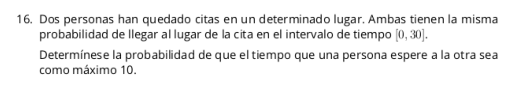

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/16.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [3]:
import numpy as np

In [99]:
def sim():
    n=0
    data = 400
    for i in range(1,data+1):
        a = np.random.uniform(0,30)
        b = np.random.uniform(0,30)
#         a = np.random.randint(0,30)
#         b = np.random.randint(0,30)
        tiempo_espera = abs(b-a)
        if(tiempo_espera<=10):
            n+=1
    return n/data

In [100]:
simulaciones = 9999
convergencia = [sim() for i in range(simulaciones)]    
print(np.mean(convergencia))

0.5560891089108911


In [101]:
valor=np.cumsum(convergencia)/np.arange(1,simulaciones+1)

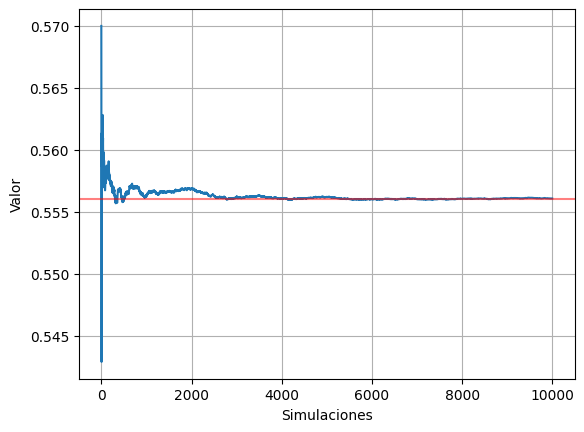

In [102]:
plt.plot(valor)
plt.grid(True)
plt.xlabel("Simulaciones")
plt.ylabel("Valor")
plt.axhline(y=np.mean(convergencia), color='r', alpha=0.5, linestyle='-', label='Línea horizontal en y=2.5')
plt.show()

# ------------------------------------ PROBLEMA 17 -------------------------------------------

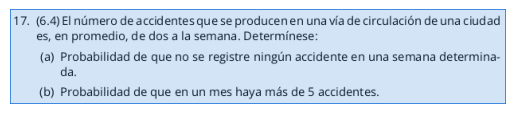

In [63]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/17.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [75]:
import numpy as np

# Parámetros del problema
lambda_semanal = 2  # Tasa promedio de accidentes por semana
num_simulaciones = 10000  # Número de simulaciones

# Simulación para la parte (a)
# Generar el número de accidentes por semana en 10,000 semanas simuladas
accidentes_por_semana = np.random.poisson(lambda_semanal, num_simulaciones)

# Calcular la probabilidad de no registrar ningún accidente en una semana
probabilidad_sin_accidentes = np.mean(accidentes_por_semana == 0)

probabilidad_sin_accidentes


0.1364

In [81]:
# Simulación para la parte (b)
# Número de semanas en un mes aproximado para la simulación
semanas_por_mes = 4

# Generar el número total de accidentes por mes en 10,000 meses simulados
# Sumamos los accidentes de 'semanas_por_mes' semanas para cada 'mes'
accidentes_por_mes = [np.sum(np.random.poisson(lambda_semanal, semanas_por_mes)) for _ in range(num_simulaciones)]

# Calcular la probabilidad de que haya más de 5 accidentes en un mes
probabilidad_mas_de_cinco_accidentes = np.mean(np.array(accidentes_por_mes) > 5)

probabilidad_mas_de_cinco_accidentes


0.8099

# ------------------------------------ PROBLEMA 18 -------------------------------------------

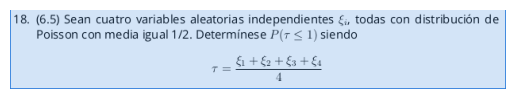

In [82]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/18.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [147]:
import numpy as np

# Parámetros de la simulación
num_simulaciones = 100000  # Aumenta para una mejor precisión
lambda_poisson = 0.5  # Media para cada variable aleatoria de Poisson
num_variables = 4  # Número de variables de Poisson a sumar

def simular_probabilidad(num_simulaciones, lambda_poisson, num_variables):
    # Generamos todas las muestras de Poisson en una sola operación
    muestras = np.random.poisson(lambda_poisson, (num_simulaciones, num_variables))
    
    # Calculamos la suma de las variables para cada simulación
    sumas = np.sum(muestras, axis=1)
    
    # Calculamos la proporción de simulaciones donde la suma es menor o igual a 4
    probabilidad_estimada = np.mean(sumas <= 4)
    
    return probabilidad_estimada

# Ejecutamos la simulación y mostramos el resultado
probabilidad_estimada = simular_probabilidad(num_simulaciones, lambda_poisson, num_variables)
print(f"Probabilidad estimada de que la suma sea menor o igual a 4: {probabilidad_estimada}")


Probabilidad estimada de que la suma sea menor o igual a 4: 0.94801


# Cálculo de Probabilidades para la Suma de Variables Aleatorias de Poisson

Consideramos una suma $ S $ de cuatro variables aleatorias independientes de Poisson, cada una con media $\lambda = \frac{1}{2}$. La suma, $ S $, sigue una distribución de Poisson con parámetro $\lambda_S = 2$.

La función de masa de probabilidad (PMF) de una distribución de Poisson con parámetro \(\lambda\) se define como:

$
P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!},
$

para $ k = 0, 1, 2, ... $.

Utilizaremos esta función para calcular las probabilidades $ P(S=k) $ para $ k = 0, 1, 2, 3, $ y $ 4 $ con $ \lambda_S = 2 $.

## Cálculo de Probabilidades

- Para $ S=0 $:

  $
  P(S=0) = \frac{e^{-2} \cdot 2^0}{0!} = e^{-2} \approx 0.13534
  $

- Para \( S=1 \):

  $
  P(S=1) = \frac{e^{-2} \cdot 2^1}{1!} = 2e^{-2} \approx 0.27068
  $

- Para \( S=2 \):

  $
  P(S=2) = \frac{e^{-2} \cdot 2^2}{2!} = 2e^{-2} \approx 0.27068
  $

- Para \( S=3 \):

  $
  P(S=3) = \frac{e^{-2} \cdot 2^3}{3!} = \frac{4e^{-2}}{3} \approx 0.18045
  $

- Para \( S=4 \):

  $
  P(S=4) = \frac{e^{-2} \cdot 2^4}{4!} = \frac{4e^{-2}}{3} \approx 0.09023
  $

## Suma de Probabilidades

Sumando estas probabilidades obtenemos $ P(S \leq 4) $:

$
P(S \leq 4) = P(S=0) + P(S=1) + P(S=2) + P(S=3) + P(S=4) \approx 0.13534 + 0.27068 + 0.27068 + 0.18045 + 0.09023 = 0.94738
$

La probabilidad final de que la suma de las cuatro variables aleatorias de Poisson con media $\lambda = \frac{1}{2}$ sea menor o igual a 4 es aproximadamente 0.94738.

## Conclusión

Este resultado nos da una medida precisa de la probabilidad deseada basada en cálculos teóricos. Debe ser comparado con resultados de simulaciones para validación, teniendo en cuenta que las diferencias menores pueden ser debidas a la naturaleza aleatoria de la simulación y al número de pruebas realizadas. Sin embargo, una gran discrepancia requeriría una revisión de los parámetros de la simulación y la metodología empleada.


# ------------------------------------ PROBLEMA 19 -------------------------------------------

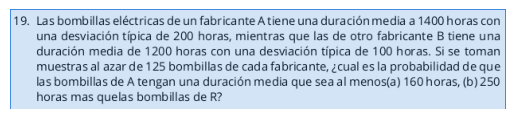

In [83]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/19.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# Teoría y Justificación de la Simulación

La simulación que realizamos se basa en varios principios y teorías estadísticas fundamentales. A continuación, se describen detalladamente:

## 1. Uso de la Distribución Normal:

Las duraciones de vida de productos como las bombillas suelen seguir una distribución normal debido a la naturaleza agregada de muchos pequeños efectos independientes que influyen en su duración (según el Teorema del Límite Central). Por lo tanto, modelamos las duraciones de las bombillas de los fabricantes A y B utilizando distribuciones normales con las siguientes características:

- Fabricante A: Una media de 1400 horas y una desviación típica de 200 horas.
- Fabricante B: Una media de 1200 horas y una desviación típica de 100 horas.

Estas distribuciones se usan para simular la duración real de las bombillas de cada fabricante.

## 2. Teorema del Límite Central:

El Teorema del Límite Central (TLC) establece que, en condiciones muy generales, cuando aumentamos el tamaño de la muestra, la distribución de la media de la muestra se acerca a una distribución normal, sin importar la forma de la distribución original. Esto justifica el uso de la distribución normal para modelar las medias de las muestras de duración de las bombillas, especialmente cuando el tamaño de la muestra es grande (en nuestro caso, 125 bombillas).

## 3. Desviación Estándar de la Media (Error Estándar):

El error estándar se utiliza para cuantificar la variación de la media de una muestra con respecto a la media de la población. Es la desviación estándar de la población dividida por la raíz cuadrada del tamaño de la muestra. En nuestra simulación, utilizamos este concepto para calcular la dispersión de las medias muestrales.

## 4. Simulación:

La simulación involucra generar repetidamente muestras aleatorias para las bombillas de ambos fabricantes, calcular sus medias y luego la diferencia entre estas medias. Al hacer esto muchas veces (100,000 en nuestro caso), obtenemos una distribución empírica de la diferencia entre las medias muestrales, la cual podemos usar para estimar probabilidades de interés, como la probabilidad de que las bombillas del fabricante A duren al menos 160 o 250 horas más que las del fabricante B.

## 5. Interpretación de los Resultados:

Los resultados de nuestra simulación indican la probabilidad de que las bombillas del fabricante A superen en duración a las del fabricante B por un cierto margen. Esto es útil para comparar la calidad y durabilidad relativa de las bombillas de diferentes fabricantes.


In [112]:
import numpy as np#N(1400,200) N(1200,100)
# Parámetros de las bombillas
media_a = 1400  # Duración media de las bombillas del fabricante A
desviacion_a = 200  # Desviación típica para A
media_b = 1200  # Duración media de las bombillas del fabricante B
desviacion_b = 100  # Desviación típica para B
n = 125 # Tamaño de la muestra
simulaciones = 100000  # Número de simulaciones

# Simulación
diferencias_medias = []

for _ in range(simulaciones):
    # Generar muestras
    muestra_a = np.random.normal(media_a, desviacion_a, n)
    muestra_b = np.random.normal(media_b, desviacion_b, n)
    
    # Calcular las medias de las muestras
    media_muestra_a = np.mean(muestra_a)
    media_muestra_b = np.mean(muestra_b)
    
    # Calcular la diferencia entre las medias
    diferencia = media_muestra_a - media_muestra_b
    diferencias_medias.append(diferencia)

# Convertir a array de numpy para facilitar los cálculos
diferencias_medias = np.array(diferencias_medias)

# Calcular probabilidades
probabilidad_160_mas = np.mean(diferencias_medias >= 160)
probabilidad_250_mas = np.mean(diferencias_medias >= 250)

probabilidad_160_mas, probabilidad_250_mas
#N(1400,200) N(1200,100)

(0.97734, 0.00626)

# ------------------------------------ PROBLEMA 20 -------------------------------------------

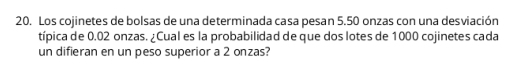

In [84]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/20.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [115]:
import numpy as np

# Parámetros de la distribución
media = 5.50  # media de peso de los cojinetes
desviacion_estandar = 0.02  # desviación estándar del peso
n_cojinetes = 1000  # número de cojinetes por lote
n_simulaciones = 10000  # número de simulaciones

# Realizar las simulaciones
diferencias = []
for _ in range(n_simulaciones):
    lote1 = np.random.normal(media, desviacion_estandar, n_cojinetes)
    lote2 = np.random.normal(media, desviacion_estandar, n_cojinetes)
    diferencia_peso = abs(sum(lote1) - sum(lote2))
    diferencias.append(diferencia_peso)

# Calcular la probabilidad
probabilidad = np.sum(np.array(diferencias) > 2) / n_simulaciones
probabilidad


0.0269

# ------------------------------------ PROBLEMA 21 -------------------------------------------

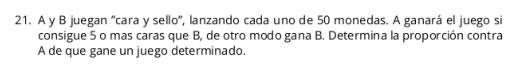

In [85]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/21.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [118]:
# Parámetros de la simulación
n_lanzamientos = 50  # número de lanzamientos por persona
n_simulaciones = 10000  # número de simulaciones
diferencia_ganar = 5  # diferencia necesaria para que A gane

# Realizar las simulaciones
victorias_A_corregidas = 0
for _ in range(n_simulaciones):
    caras_A = np.sum(np.random.rand(n_lanzamientos) > 0.5)
    caras_B = np.sum(np.random.rand(n_lanzamientos) > 0.5)
    if (caras_A - caras_B) >= diferencia_ganar:  # Condición corregida
        victorias_A_corregidas += 1

# Calcular la proporción corregida de victorias de A
proporcion_victorias_A_corregida = victorias_A_corregidas / n_simulaciones
proporcion_victorias_A_corregida


0.1868

# ------------------------------------ PROBLEMA 22 -------------------------------------------

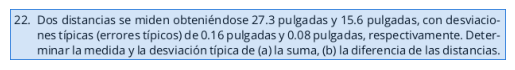

In [86]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/22.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [125]:
# Parámetros de las medidas
media1, media2 = 27.3, 15.6  # medias de las distancias
desv1, desv2 = 0.16, 0.08  # desviaciones típicas

# Parámetros de la simulación
n_simulaciones = 10000  # número de simulaciones

# Realizar las simulaciones
sumas = []
diferencias = []
for _ in range(n_simulaciones):
    muestra1 = np.random.normal(media1, desv1)
    muestra2 = np.random.normal(media2, desv2)
    sumas.append(muestra1 + muestra2)
    diferencias.append(muestra1 - muestra2)

# Calcular la media y la desviación estándar para las sumas y diferencias
media_suma_simulada = np.mean(sumas)
desviacion_suma_simulada = np.std(sumas)
media_diferencia_simulada = np.mean(diferencias)
desviacion_diferencia_simulada = np.std(diferencias)

(media_suma_simulada, desviacion_suma_simulada, media_diferencia_simulada, desviacion_diferencia_simulada)


(42.900529500290126,
 0.1776269698540129,
 11.701615497633494,
 0.17968555766973834)

# ------------------------------------ PROBLEMA 23 -------------------------------------------

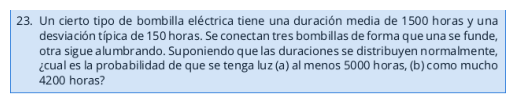

In [87]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/23.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [133]:
# Parámetros de las bombillas
media_bombilla = 1500  # media de duración de cada bombilla
desv_bombilla = 150   # desviación típica de la duración

# Simulación para tres bombillas
duracion_total_simulada = []
for _ in range(n_simulaciones):
    # Sumar las duraciones de tres bombillas
    duracion = sum(np.random.normal(media_bombilla, desv_bombilla, 3))
    duracion_total_simulada.append(duracion)

# Calcular las proporciones para cada escenario
proporcion_mayor_5000 = np.mean(np.array(duracion_total_simulada) >= 5000)
proporcion_menor_4200 = np.mean(np.array(duracion_total_simulada) <= 4200)

(proporcion_mayor_5000, proporcion_menor_4200)


(0.0278, 0.1289)

# ------------------------------------ PROBLEMA 24 -------------------------------------------

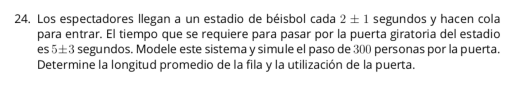

In [134]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/24.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [148]:
import numpy as np

# Parámetros de la simulación
num_personas = 300
tiempo_entre_llegadas = np.random.uniform(1, 3, num_personas)  # Tiempos entre llegadas
tiempo_en_puerta = np.random.uniform(2, 8, num_personas)  # Tiempos en la puerta giratoria

# Simulación
tiempos_llegada = np.cumsum(tiempo_entre_llegadas)  # Tiempo en que cada persona llega
tiempos_salida = np.zeros(num_personas)  # Tiempo en que cada persona sale de la puerta

# La primera persona pasa directamente
tiempos_salida[0] = tiempos_llegada[0] + tiempo_en_puerta[0]

# Calculamos los tiempos de salida para el resto de las personas
for i in range(1, num_personas):
    # La persona puede empezar a pasar por la puerta cuando llega o después de que la persona anterior haya salido
    inicio_puerta = max(tiempos_llegada[i], tiempos_salida[i - 1])
    tiempos_salida[i] = inicio_puerta + tiempo_en_puerta[i]

# Longitudes de la fila en cada instante
longitudes_fila = np.maximum(0, np.searchsorted(tiempos_salida, tiempos_llegada, side='right') - np.arange(num_personas))

# Longitud promedio de la fila
longitud_promedio_fila = np.mean(longitudes_fila)

# Utilización de la puerta
tiempo_total = tiempos_salida[-1] - tiempos_llegada[0]  # Total de tiempo desde que llega la primera persona hasta que sale la última
tiempo_uso_puerta = sum(tiempo_en_puerta)  # Total de tiempo que la puerta está siendo usada
utilizacion_puerta = tiempo_uso_puerta / tiempo_total

longitud_promedio_fila, utilizacion_puerta


(0.0, 1.0000000000000002)

# ------------------------------------ PROBLEMA 25 -------------------------------------------

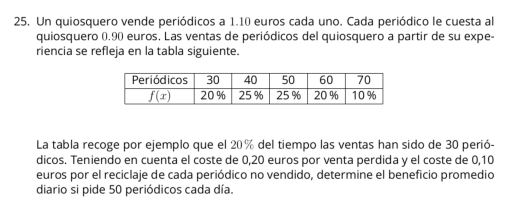

In [135]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/25.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# ------------------------------------ PROBLEMA 26 -------------------------------------------

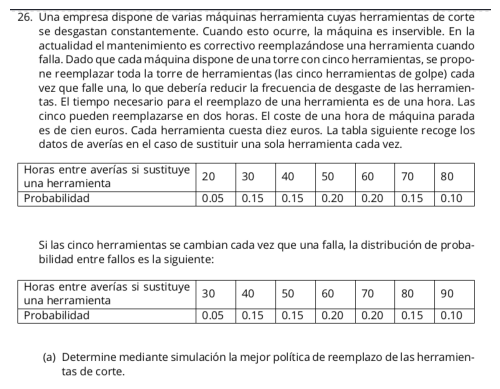

In [136]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/26.png")

plt.imshow(image)
plt.axis(False)
plt.show()

In [ ]:
#Falta Inciso B

# ------------------------------------ PROBLEMA 27 -------------------------------------------

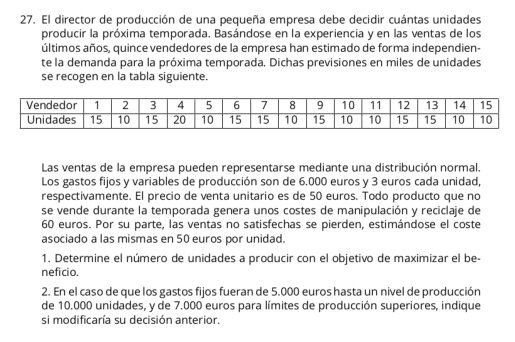

In [137]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/27.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# ------------------------------------ PROBLEMA 28 -------------------------------------------

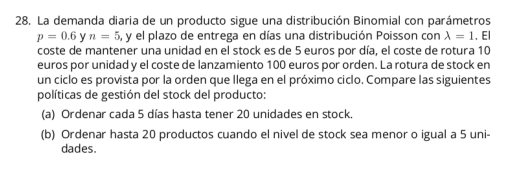

In [138]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/28.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# ------------------------------------ PROBLEMA 29 -------------------------------------------

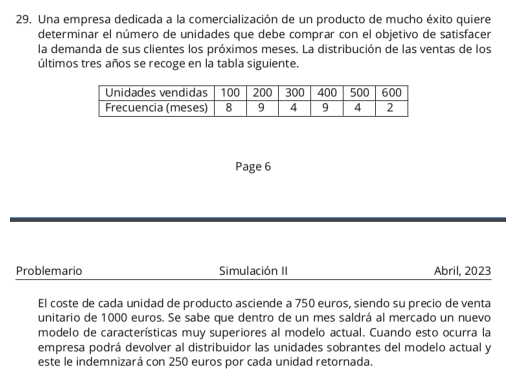

In [139]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/29.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# ------------------------------------ PROBLEMA 30 -------------------------------------------

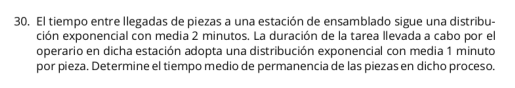

In [140]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/30.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# ------------------------------------ PROBLEMA 31 -------------------------------------------

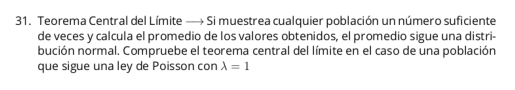

In [141]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("pic/31.png")

plt.imshow(image)
plt.axis(False)
plt.show()

# ---------------------------------------------- F I N  -----------------------------------------------------

In [16]:
print("FIN")

FIN
